Model training!

In [4]:
import pandas as pd
df = pd.read_csv('cleaned_train.csv')
df.head()

,PassengerId,Survived,SibSp,Parch,Fare,Cabin,is_male,norm_age,emb_s,emb_c,Pclass_1,Pclass_2
0,1,0,1,0,7.2500,NaN,1,0.271174,1,0,0,0
1,2,1,1,0,71.2833,C85,0,0.472229,0,1,1,0
2,3,1,0,0,7.9250,NaN,0,0.321438,1,0,0,0
3,4,1,1,0,53.1000,C123,0,0.434531,1,0,1,0
4,5,0,0,0,8.0500,NaN,1,0.434531,1,0,0,0


In [5]:
from fastai.tabular.all import (
    TabularDataLoaders, RandomSplitter,
    FillMissing, Categorify, Normalize, range_of, RegressionBlock
)

df['Survived'] = df['Survived'].astype(float)
procs = [Categorify, FillMissing, Normalize]
path = '.'     
cat_names  = ['SibSp','Parch','is_male']
cont_names = ['Fare','norm_age','emb_s','emb_c','Pclass_1','Pclass_2']
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(train))

dls = TabularDataLoaders.from_df(
    df, path='.', procs=procs,
    cat_names=cat_names, cont_names=cont_names,
    y_names='Survived',
    y_block=RegressionBlock(),
    splits=splits
)

In [ ]:
from fastai.tabular.all import MSELossFlat, rmse, mae, R2Score, tabular_learner

learn = tabular_learner(
    dls,
    loss_func=MSELossFlat(),
    metrics=[rmse, mae, R2Score()] 
)

epoch,train_loss,valid_loss,_rmse,mae,r2_score,time
0,0.217374,0.255183,0.505157,0.383279,-0.041391,00:00
1,0.235840,0.352085,0.593368,0.470875,-0.436845,00:00
2,0.219055,0.212926,0.461439,0.353197,0.131058,00:00
3,0.202326,0.165991,0.407419,0.282587,0.322600,00:00
4,0.186835,0.142636,0.377672,0.285505,0.417908,00:00
5,0.173035,0.142791,0.377877,0.281780,0.417276,00:00
6,0.164631,0.139970,0.374126,0.294998,0.428788,00:00
7,0.157740,0.141483,0.376143,0.301352,0.422613,00:00


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

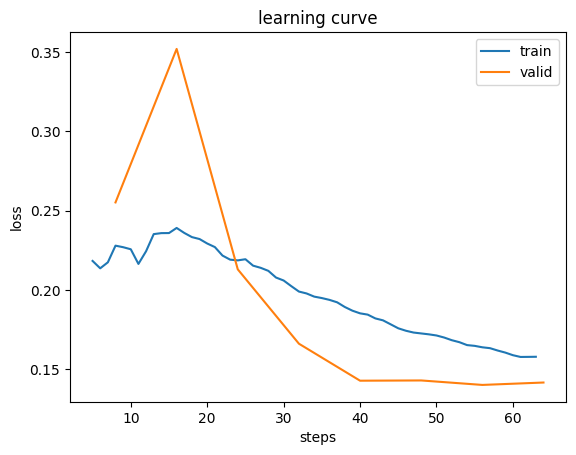

In [23]:
from fastai.tabular.all import tabular_learner, accuracy

learn.fit_one_cycle(8,slice(1e-3, 1e-2))
learn.recorder.plot_loss()


Validation accuracy:  37.61%
Validation error rate: 62.39%
steps_per_epoch=8 batches/epoch
total_steps=40 total training steps


SuggestedLRs(valley=0.001737800776027143)

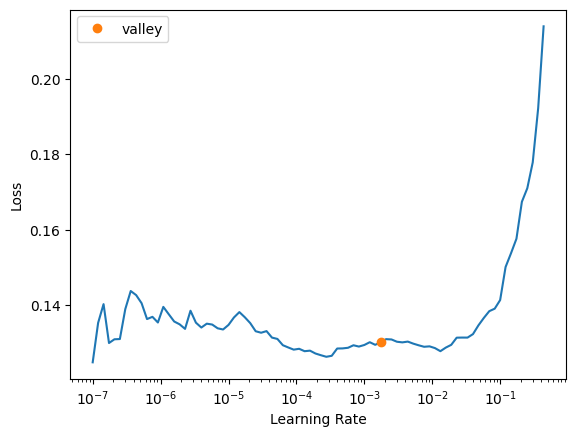

In [24]:
res = learn.validate()
valid_loss, accuracy = res[0], res[1]
print(f"Validation accuracy:  {accuracy*100:.2f}%")
print(f"Validation error rate: {(1-accuracy)*100:.2f}%")

# steps per epoch
steps_per_epoch = len(dls.train)
print(f"{steps_per_epoch=} batches/epoch")

# if you’re going to train n_epochs
n_epochs = 5
total_steps = steps_per_epoch * n_epochs
print(f"{total_steps=} total training steps")

# run the finder
learn.lr_find()

